# 6.4 Machine Learning Part I

### Table of Contents:
1. Importing Libraries and Data
2. Data Cleaning
3. Data Prep for Regression Analysis
4. Regression Analysis
5. Analysis (Question 13 of Task)

### 1. Importing Libraries and Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Graphs are displayed within notebook
%matplotlib inline

In [3]:
path = r'/Users/jakeupchurch/Documents/UFC Project'

In [4]:
ufc = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Data_Cleaned2.csv'))

### 2. Data Cleaning

In [5]:
ufc.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage', 'R_Stance',
       'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age',
       'KO/TKO', 'AVG_KD'],
      dtype='object', length=146)

In [6]:
ufc.head()

R_fighter          B_fighter        Referee     date location Winner  \
0   Adrian Yanez      Gustavo Lopez  Chris Tognoni  3/20/21  Alabama    Red   
1   Trevin Giles      Roman Dolidze      Herb Dean  3/20/21  Alabama    Red   
2    Tai Tuivasa    Harry Hunsucker      Herb Dean  3/20/21  Alabama    Red   
3  Cheyanne Buys  Montserrat Conejo     Mark Smith  3/20/21  Alabama   Blue   
4  Marion Reneau      Macy Chiasson     Mark Smith  3/20/21  Alabama   Blue   

   title_bout       weight_class  B_avg_KD  B_avg_opp_KD  ...  \
0       False       Bantamweight     0.000           0.0  ...   
1       False       Middleweight     0.500           0.0  ...   
2       False        Heavyweight       NaN           NaN  ...   
3       False   WomenStrawweight       NaN           NaN  ...   
4       False  WomenBantamweight     0.125           0.0  ...   

   R_win_by_Submission  R_win_by_TKO_Doctor_Stoppage  R_Stance  R_Height_cms  \
0                    0                             0  Orthodox        170.18   
1                    0                             0  Orthodox        182.88   
2                    0                             0  Southpaw        187.96   
3                    0                             0    Switch        160.02   
4                    2                             0  Orthodox        167.64   

   R_Reach_cms  R_Weight_lbs  B_age  R_age  KO/TKO  AVG_KD  
0       177.80         135.0   31.0   27.0     1.0  0.0000  
1       187.96         185.0   32.0   28.0     4.0  0.2500  
2       190.50         264.0   32.0   28.0     3.0  0.0000  
3       160.02         115.0   28.0   25.0     0.0  0.0000  
4       172.72         135.0   29.0   43.0     4.0  0.0625  

[5 rows x 146 columns]

In [7]:
ufc.shape

(3945, 146)

In [27]:
#Check for Missing Values
ufc.isnull().sum()

#Missing Values in KO/TKO are going to replaced with zeroes since blank more than likely meant no KO/TKO


R_fighter         0
B_fighter         0
Referee          16
date              0
location          0
               ... 
R_Weight_lbs      2
B_age           147
R_age            56
KO/TKO           36
AVG_KD            0
Length: 146, dtype: int64

In [28]:
#Replacing missing Values
ufc['KO/TKO'] = ufc['KO/TKO'].fillna(0)

In [29]:
#Checking for Duplicates
dups = ufc.duplicated()

In [30]:
dups.shape

(3945,)

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_27060/1977180096.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ufc['AVG_KD'], bins=25) #No extreme values found in Average Knockdowns
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

<Axes: xlabel='AVG_KD', ylabel='Density'>

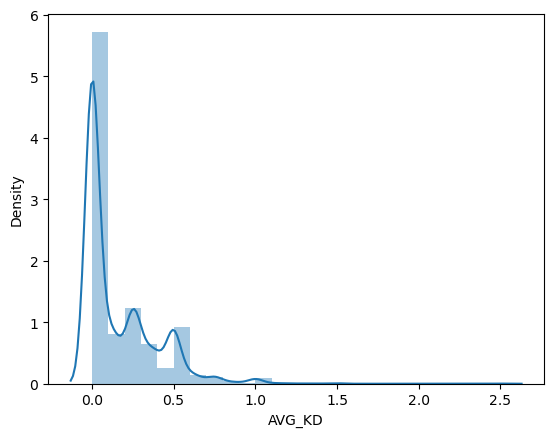

In [31]:
#Check for Extreme Values
sns.distplot(ufc['AVG_KD'], bins=25) #No extreme values found in Average Knockdowns

In [32]:
ufc['AVG_KD'].mean()

0.16210165656223072

In [33]:
ufc['AVG_KD'].median()

0.018554688

In [34]:
ufc['AVG_KD'].max()

2.5

### 3. Data Prep for Regression Analysis

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

ufc.plot(x = 'AVG_KD', y='KO/TKO',style='o')
plt.title('Average Knockdowns vs KO/TKO Victory')  
plt.xlabel('AVG_KD')  
plt.ylabel('KO/TKO')  
plt.show()

### Hypothesis:  The more average knockdowns there are in a fight, the higher likelihood there is of a KO/TKO victory.

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = ufc['AVG_KD'].values.reshape(-1,1)
y = ufc['KO/TKO'].values.reshape(-1,1)

In [37]:
X

array([[0.  ],
       [0.25],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [38]:
y

array([[1.],
       [4.],
       [3.],
       ...,
       [0.],
       [0.],
       [0.]])

In [39]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [40]:
# Create a regression object.

regression = LinearRegression()

In [41]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

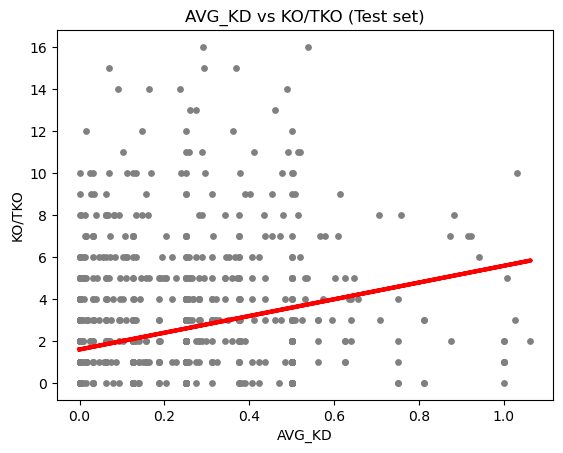

In [43]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('AVG_KD vs KO/TKO (Test set)')
plot_test.xlabel('AVG_KD')
plot_test.ylabel('KO/TKO')
plot_test.show()

### Question 10:  The line does not appear to fit the data welll at all.

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [46]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.98542695]]
Mean squared error:  7.32307140933243
R2 score:  0.10053730070714295


In [47]:
y_predicted

array([[1.59345408],
       [2.58981082],
       [1.59345408],
       ...,
       [2.58981082],
       [2.09163245],
       [1.59345408]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0      1.0   1.593454
1      1.0   2.589811
2      0.0   1.593454
3      6.0   1.593454
4      2.0   1.593454
5      0.0   1.593454
6      0.0   1.593454
7      0.0   3.586168
8      6.0   2.683219
9      3.0   2.901172
10     0.0   1.593454
11     0.0   1.593454
12     6.0   2.033252
13     1.0   1.593454
14     7.0   1.718485
15     0.0   2.091632
16     0.0   1.593454
17     1.0   3.523895
18     1.0   1.593454
19     4.0   4.582524
20     6.0   2.091632
21     1.0   1.593454
22     2.0   3.586168
23     0.0   1.593454
24     0.0   1.593454
25     0.0   1.593454
26     0.0   1.593454
27     6.0   1.593454
28     7.0   3.399351
29     0.0   1.593454

In [49]:
#Compare how regression fits the training set.

y_predicted_train = regression.predict(X_train)

In [50]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.98542695]]
Mean squared error:  7.814662415114047
R2 score:  0.09773095252981512


In [52]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('AVG_KD vs KO/TKO (Train set)')
plot_test.xlabel('AVG_KD')
plot_test.ylabel('KO/TKO')
plot_test.show()

### 5. Analysis (Question 13)

### Obviously, the model did not perform very well.  It does not appear that average knockdowns can predict a KO/TKO victory in a round.  The r2 score was .10 which is very low and as I know from the reading, the lower the score the means the worse the fit is for the model.  I'm sure there is a better statistic or group of statistics that can predict a KO/TKO I will just need to keep trying different variables.  There could be some bias in this data due to collection bias.  What is considered a knockdown may not be the same for all judges/statisticians so the knockdown statistic could be slightly biased.  I assume most of the stat recorders are experienced and trained, but to what degree may cause some bias.